### FINPROS - MODELING TEST
#### **Applicant**: Nguyen Anh Tuong.
#### **Location**: Thu Duc City, Ho Chi Minh City, Viet Nam.
#### **Topic**: Stock Price Volatility Prediction Models.
---

### 1. Data Collection

In [2]:
import pandas as pd
import numpy as np
try:
    FPT_df = pd.read_csv('Data/FPT.csv')
except FileNotFoundError:
    print("FPT.csv not found.")
try:
    MSN_df = pd.read_csv('Data/MSN.csv')
except FileNotFoundError:
    print("MSN.csv not found.")
try:
    PNJ_df = pd.read_csv('Data/PNJ.csv')
except FileNotFoundError:
    print("PNJ.csv not found.")
try:
    VIC_df = pd.read_csv('Data/VIC.csv')
except FileNotFoundError:
    print("VIC.csv not found.")
raw_df = pd.concat([FPT_df, MSN_df, PNJ_df, VIC_df], ignore_index=True)

In [ ]:
#TEST
raw_df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [ ]:
#Write df to combined.csv file
raw_df.to_csv('Data/Combined.csv', index=False)

---

### 2. Data Preprocessing and Exploration

1. **Drop the Ticker column:** Since our model is intended to predict price movements, this column can be removed.

In [ ]:
raw_df.drop(columns='Ticker', inplace=True);

2. **Consider some general information about the dataset**

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459335 entries, 0 to 459334
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date/Time      459335 non-null  object 
 1   Open           459335 non-null  float64
 2   High           459335 non-null  float64
 3   Low            459335 non-null  float64
 4   Close          459335 non-null  float64
 5   Volume         459335 non-null  int64  
 6   Open Interest  459335 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 24.5+ MB


**Comment:** 
1. There are 459335 rows and 8 columns in total. 
2. All columns have no missing values. (**Missing value ratio: 0%**)
3. Most columns have the correct data type, except for the Data/Time column.
   * Currently the Data/Time column does not have the correct data type. We need to convert the object type to datatime.

3. **Change Data/Time column datatype and sort the value by date/time**

In [ ]:
raw_df['Date/Time'] = pd.to_datetime(raw_df['Date/Time'], errors='coerce')

In [ ]:
#TEST
print(raw_df['Date/Time'].dtypes)

datetime64[ns]


In [ ]:
raw_df = raw_df.sort_values(by='Date/Time', ascending=False)

4. **Remove the duplicated rows**

In [ ]:
num_duplicates = raw_df.duplicated().sum()
print(f"No. duplicated rows in the combined dataset: {num_duplicates}")

No. duplicated rows in the combined dataset: 4


**Comment:** There are 4 rows in the data set that are completely duplicated. This accounts for ~0.0% of the total. So we can remove them from the dataset without affecting too much the final result of the model and dataset.

In [ ]:
raw_df.drop_duplicates(inplace=True)

In [ ]:
#TEST
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459331 entries, 459334 to 97406
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date/Time      459331 non-null  datetime64[ns]
 1   Open           459331 non-null  float64       
 2   High           459331 non-null  float64       
 3   Low            459331 non-null  float64       
 4   Close          459331 non-null  float64       
 5   Volume         459331 non-null  int64         
 6   Open Interest  459331 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 28.0 MB


5. **For each column, how are values distributed?**

In [ ]:
raw_df.describe()

,Date/Time,Open,High,Low,Close,Volume,Open Interest
count,459331,459331.000000,459331.000000,459331.000000,459331.000000,4.593310e+05,459331.0
mean,2019-10-09 03:41:20.670452480,74.545947,74.626701,74.481186,74.546304,4.909427e+03,0.0
min,2017-12-25 09:15:00,30.250000,30.250000,30.220000,30.250000,1.000000e+00,0.0
25%,2019-03-08 10:30:30,54.190000,54.250000,54.150000,54.190000,3.600000e+02,0.0
50%,2019-11-05 14:21:00,75.730000,75.920000,75.600000,75.720000,1.500000e+03,0.0
75%,2020-06-08 10:49:00,90.100000,90.200000,90.000000,90.100000,4.920000e+03,0.0
max,2020-12-22 14:46:00,126.100000,126.500000,126.100000,126.500000,3.300680e+06,0.0
std,NaN,23.023407,23.038262,23.011681,23.024442,1.902112e+04,0.0


**Comment:**
* Time period of the dataset: Data covers approximately 3 years, from 2017 to 2020.
* Prices (**Open, High, Low, Close**) range from 30 to 126, with an average of around 74.5
* Comparing the min and max of the columns, we can see that the values ​​of the columns are all within a range that satisfies the existence condition.
* Looking at the Volume column: we see the average value is 4,909 with the smallest value being 1 and the largest being 3,300,000. This shows that there is a huge difference in trading volume.
* For the Open Interest column: we can see all values ​​are 0 (Mean = 0, Std = 0 also). This is probably a column that does not contain useful information in this data set. **=> We can drop this column.**

**Drop the "Open Interest" columns**

In [ ]:
raw_df.drop(columns='Open Interest', inplace=True)

**Visualize the value distribution of columns**

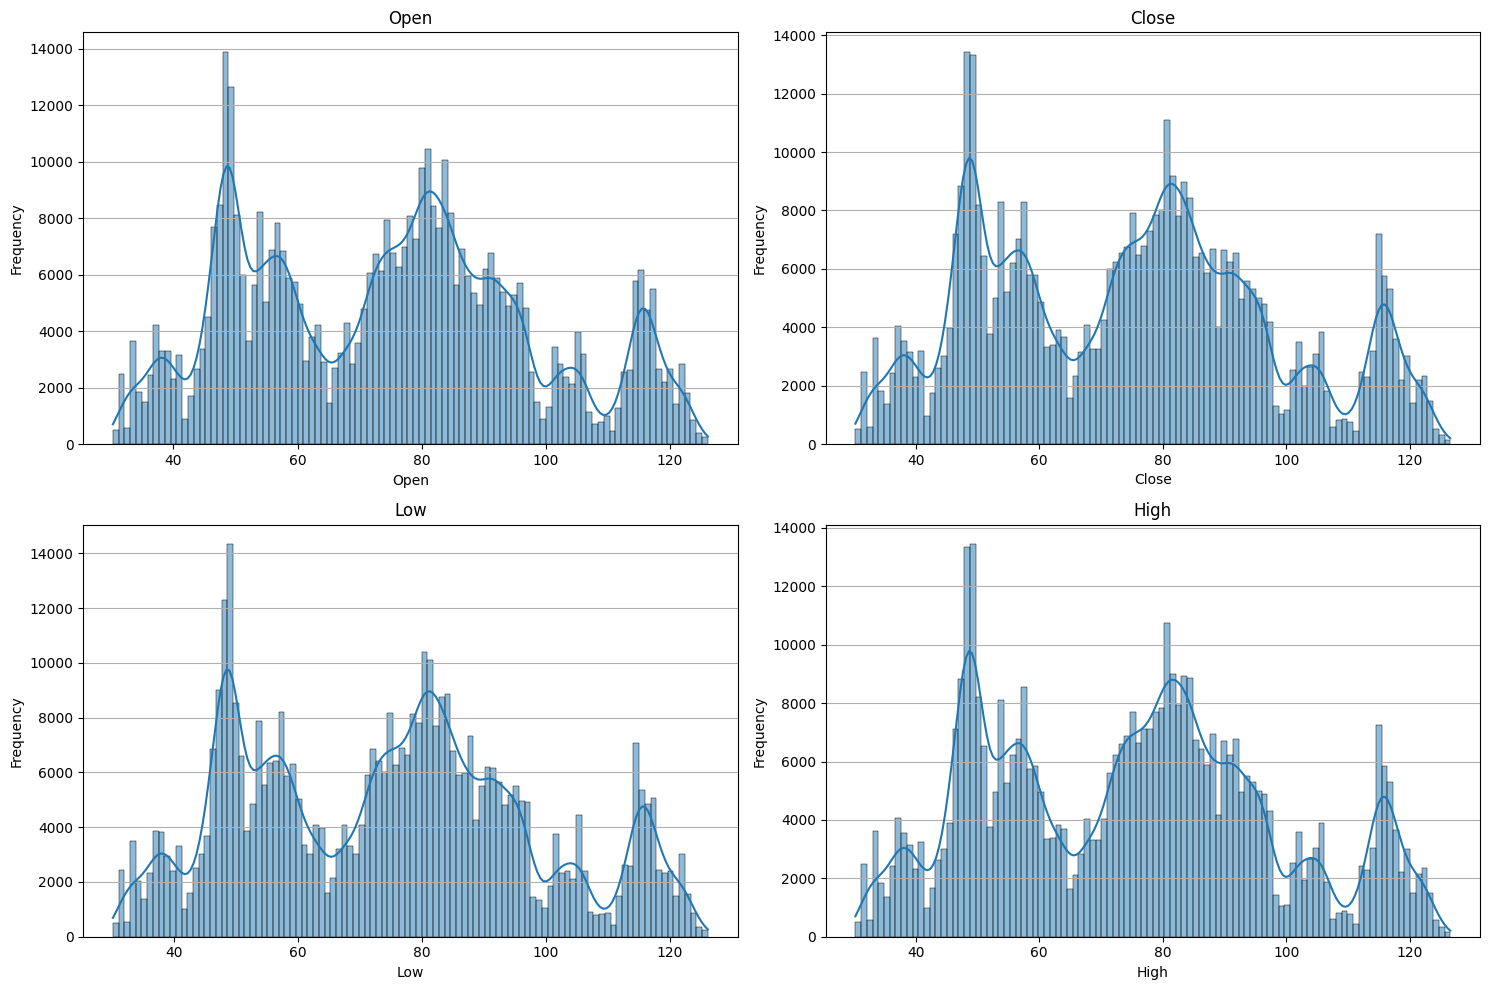

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = raw_df.select_dtypes(include='number').columns

# Chart for Open, High, Low, Close column
plot_columns = ['Open', 'Close', 'Low', 'High']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # 2 rows, 2 cols
for i, col in enumerate(plot_columns):
    row, col_pos = divmod(i, 2)
    sns.histplot(data=raw_df, x=col, kde=True, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'{col}')
    axes[row, col_pos].set_xlabel(col)
    axes[row, col_pos].set_ylabel('Frequency')
    axes[row, col_pos].grid(axis='y')
plt.tight_layout()
plt.show()

**Comment:** 
* The Open, High, Low, and Close columns have fairly similar distributions, which is understandable since these values ​​are often closely related (especially in financial data). 
* There are multiple price peaks (multimodal distribution), indicating that the data can be divided into clusters.
* The data has a high concentration in some price ranges, for example, the 40-50 and 70-90 ranges have a high frequency of occurrence.

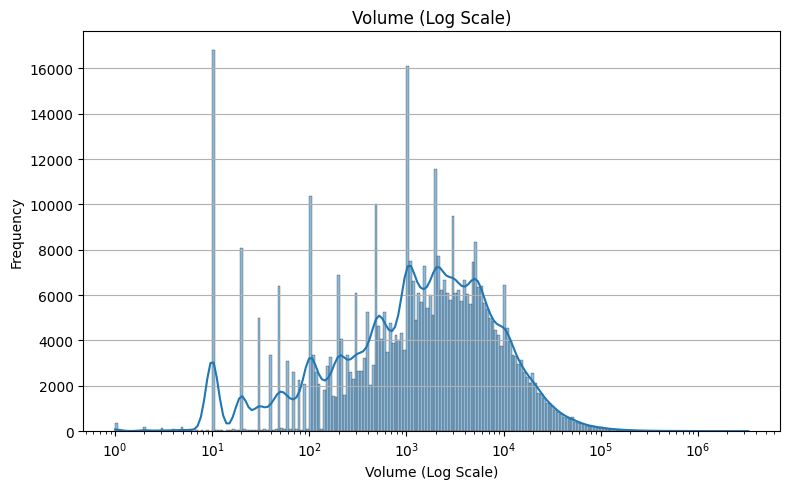

In [ ]:
# Log scale chart for Volume column, because the huge difference in trading volume ( 1 vs more than 3.000.000 )
plt.figure(figsize=(8, 5))
sns.histplot(data=raw_df, x='Volume', kde=True, log_scale=(True, False))  # x-axis log scaled 
plt.title('Volume (Log Scale)')
plt.xlabel('Volume (Log Scale)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.grid(axis='y')
plt.show()

**Comment:** 
* The chart shows that the range of column values ​​is very large (1 vs. more than 10^6)
* The data are concentrated mainly in the range 10^2 (100) to 10^4 (10,000), with some extremely large values extending to 10^6 (1,000,000).
* The highest peak is in the range 10^3 (1,000), shows that most of the trading volume occurs at the average level.
* The distribution is long-tailed (right-skewed), with some values ​​greater than 10^5 (100,000). This indicates the presence of very large volume transactions.

6. **Consider outliers for each columns**

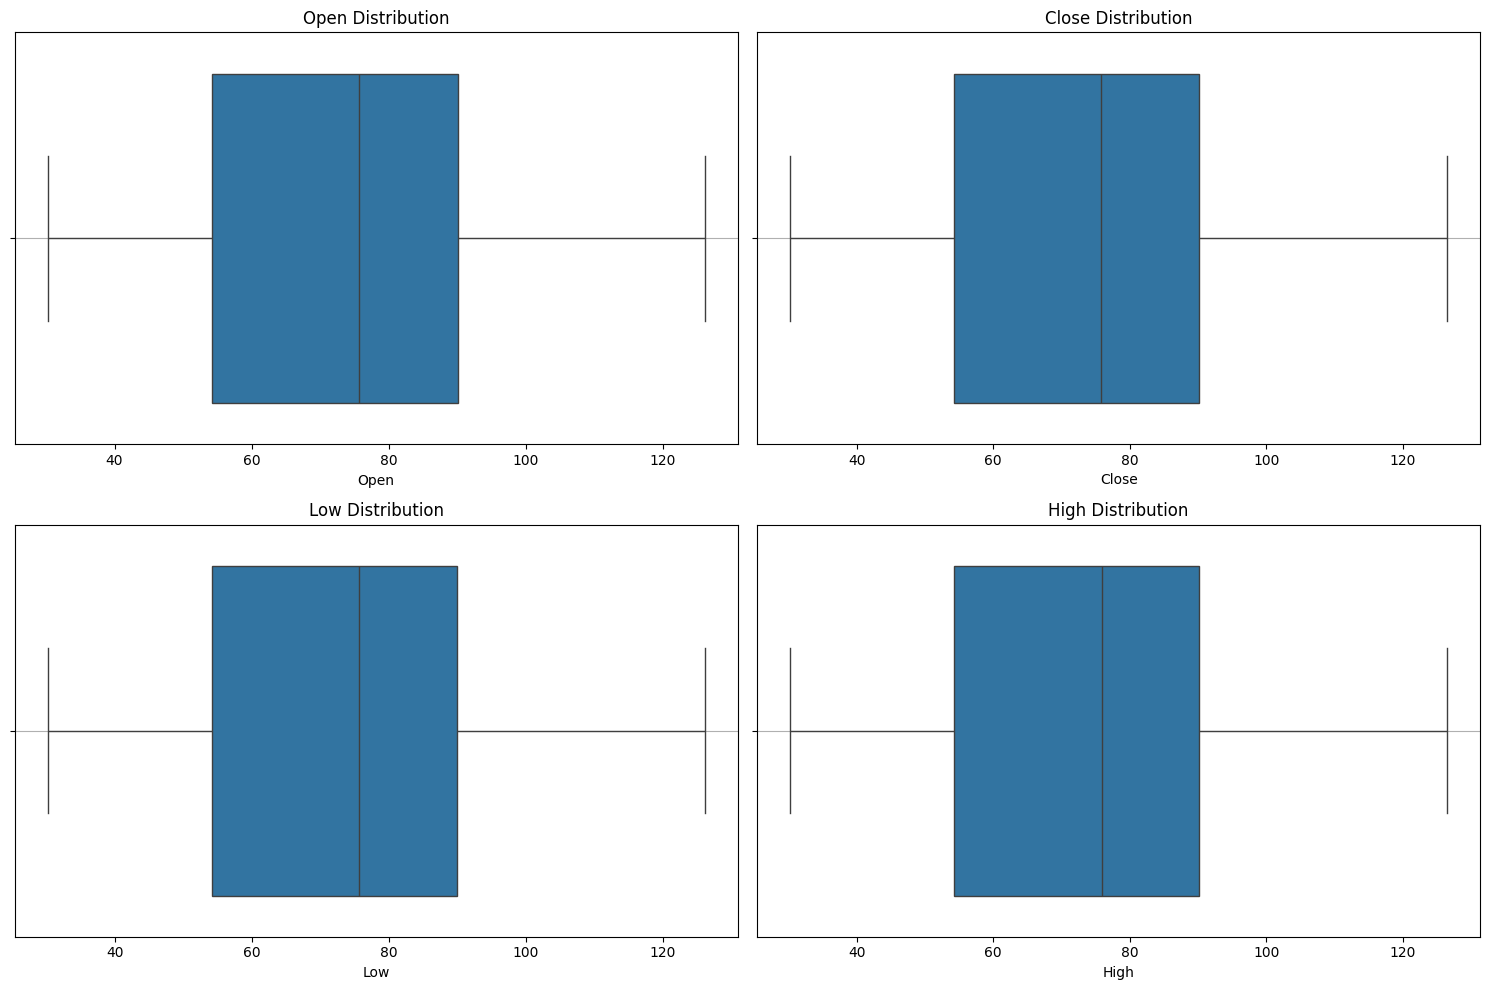

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # 2 rows, 2 cols

for i, col in enumerate(plot_columns):
    row, col_pos = divmod(i, 2)  
    sns.boxplot(data=raw_df, x=col, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'{col} Distribution')
    axes[row, col_pos].set_xlabel(col)
    axes[row, col_pos].grid(axis='y')

plt.tight_layout()
plt.show()

**Comment:**
* There's no outliers were seen, this could be due to data being cleaned or extreme values ​​being uncommon.
* The boxplots show a fairly symmetric distribution, with the median lying near the middle of the box. This implies that the data is probably close to a normal distribution.

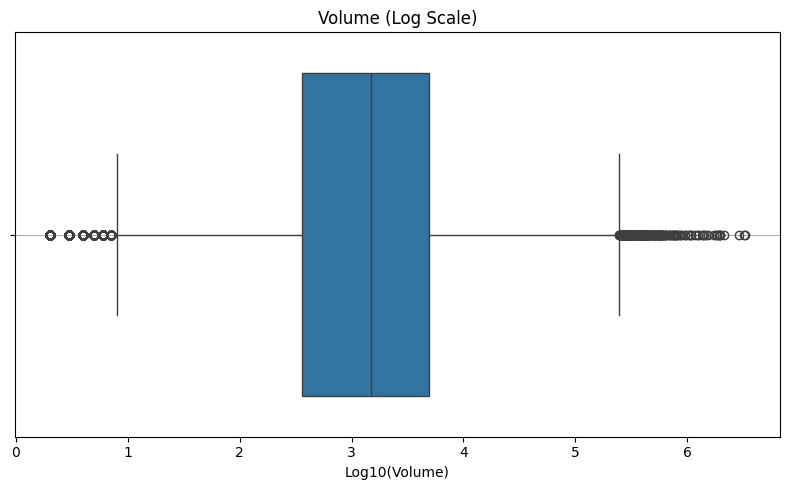

In [ ]:
# Log-transform the Volume column to handle large differences in scale
raw_df['Log_Volume'] = np.log10(raw_df['Volume'] + 1)  # Adding 1 to avoid log(0)

# Create a boxplot for the log-transformed Volume
plt.figure(figsize=(8, 5))
sns.boxplot(data=raw_df, x='Log_Volume')
plt.title('Volume (Log Scale)')
plt.xlabel('Log10(Volume)')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Comment:**
* There are many outliers on both sides:
  * Left side (low value): Transactions with very small volume, close to 1
  * Right side (high value): Transactions larger than 10^5 = 100.000
* Since the number of outliers is quite large, we can consider the method of removing some outliers to reduce the noise of the data set. 
* Especially because for high linearity models, noise has a great influence on the final prediction result (because the model will try to learn according to the noisy values, while those values ​​are very rare and play a not so important role).

**Notice:**
* Here we have some other options depending on the customer's needs. For example, if they want to handle outliers with large volume transactions instead of just focusing on the majority, we will not eliminate these outliers but use some other methods such as:
  * Get more data.
  * Collapse outliers to a certain value (e.g. 1st percentile and 99th percentile thresholds) with Winsorization.
  * Binning based on Volume.
  * Class weights.

**Handle volume column outliers using Winsorization and delete original volume column**

In [ ]:
from scipy.stats.mstats import winsorize

raw_df['Volume_Winsorized'] = winsorize(raw_df['Volume'], limits=(0.01, 0.01))  # upper/lower 1%

             Volume  Volume_Winsorized
count  4.593310e+05      459331.000000
mean   4.909427e+03        4344.321398
std    1.902112e+04        7628.383488
min    1.000000e+00          10.000000
25%    3.600000e+02         360.000000
50%    1.500000e+03        1500.000000
75%    4.920000e+03        4920.000000
max    3.300680e+06       48150.000000


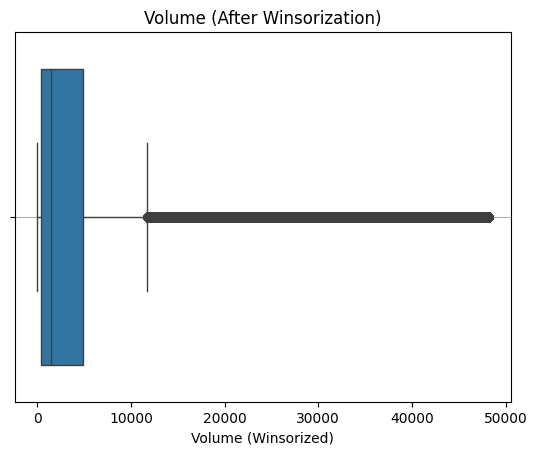

In [ ]:
# TEST
print(raw_df[['Volume', 'Volume_Winsorized']].describe())

sns.boxplot(data=raw_df, x='Volume_Winsorized')
plt.title('Volume (After Winsorization)')
plt.xlabel('Volume (Winsorized)')
plt.grid(axis='y')
plt.show()

In [ ]:
raw_df.drop(columns='Volume', inplace=True)
raw_df.drop(columns='Log_Volume', inplace=True)

**Comment:**
* It can be seen that extremely large values ​​are not discarded but compressed closer to the thresholds (1st and 99th percentile), which reduces their impact during analysis and modeling.
* Winsorization generally reduces the impact of outliers, but the largest values ​​(around 50,000) still exist as "tipping points" (the end of the whisker).

7. **Examine the correlation between columns with each other through the correlation matrix**

In [ ]:
correlation_matrix = raw_df.corr()

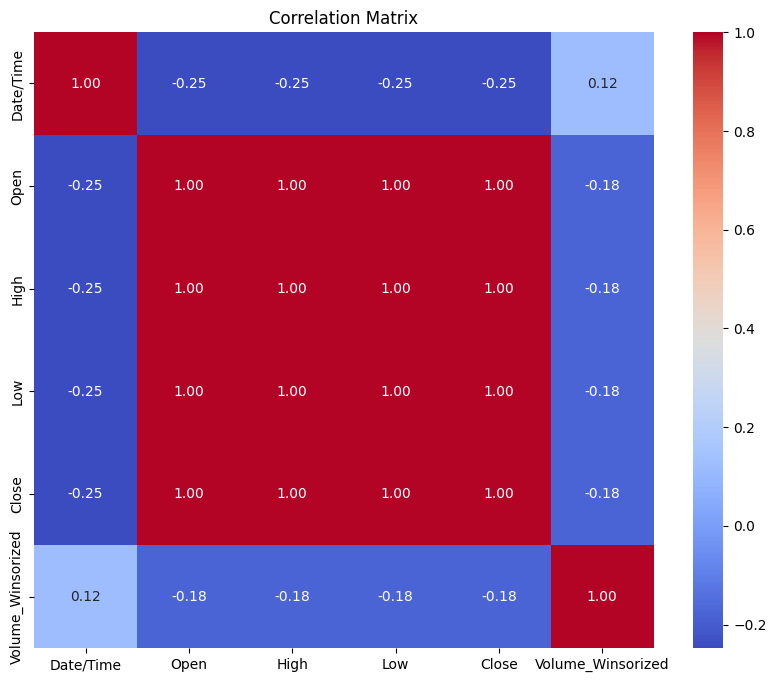

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

**Comment:**
* The Open, High, Low, and Close columns have a correlation of 1.0 with each other. This indicates that these values ​​have a perfect linear relationship.
* Volume has a low correlation (around -0.18) with the price columns (Open, High, Low, Close). This shows that trading volume does not have a strong linear relationship with price.
* The Date/Time column has a correlation of -0.25 with the price columns (Open, High, Low, Close) and 0.12 with Volume, So time has some impact on price, but is not the deciding factor. 

**Methods:**
* Because the columns Open, High, Low, Close have a correlation of 1.0, a perfect linear correlation, we will only keep one of these 4 columns. Here I will choose to keep the Close column because closing prices are often used to analyze price trends.
* Reasons for:
  * Keeping all 4 columns above will cause multicollinearity. This means that all 4 combinations will not provide new information to the model, or in other words, this is redundant information.
  * When all are included in the model, this will cause:
      * The coefficients of the model will fluctuate greatly (especially in linear models).
      * Difficulty in identifying important features.
      * This **reduces the performance** of the model, **increases the calculation time** and most importantly reduces the **explanatory ability** of the model because we will not clearly understand the role of each factor on the target variable.

In [ ]:
raw_df.rename(columns={'Volume_Winsorized': 'Volume'}, inplace=True)
new_df = raw_df.drop(columns=['Open', 'High', 'Low'])

In [ ]:
#TEST
new_df.head()

,Date/Time,Close,Volume
459334,2020-12-22 14:46:00,105.7,90
358068,2020-12-22 14:46:00,78.3,1500
232759,2020-12-22 14:46:00,82.8,200
97405,2020-12-22 14:46:00,58.1,11170
97404,2020-12-22 14:29:00,58.1,2500


---
### 3. Proceed to split the target data and consider adding technical indicators to increase the accuracy of the model.

**Comments:** 
* Since we are merging 4 data files together, there will be some overlap in the time period. 
* The model we want to build is only for the purpose of predicting stock price movements, so we can ignore the data labels (such as stock codes). Instead, we will calculate the average for each column corresponding to each overlapping time period.

**Notice:**
* Here we will be interested in the price of the stock at that time, so we will not care if one or a few corresponding time points for each stock are missing. For example, when we see the closing average at time **t**, but at this time FPT and PNJ have data, but VIC and MSN do not have data, then the average calculation is still performed as usual.

In [ ]:
new_df = new_df.groupby('Date/Time').mean().reset_index()

In [ ]:
#TEST
new_df.sort_values('Date/Time', ascending=False, inplace=True)
new_df.head()

,Date/Time,Close,Volume
163176,2020-12-22 14:46:00,81.225,3240.0
163175,2020-12-22 14:29:00,58.100,2500.0
163174,2020-12-22 14:27:00,82.800,300.0
163173,2020-12-22 14:26:00,58.200,500.0
163172,2020-12-22 14:25:00,81.200,6992.5


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163177 entries, 163176 to 0
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  163177 non-null  datetime64[ns]
 1   Close      163177 non-null  float64       
 2   Volume     163177 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.0 MB


**Comment:** 
* Notice that in the original data set and the data after training, the time periods are not continuous, or in other words, the data is incomplete in each period. For example, FPT stock starts from 12/25/2018, data is collected from 9:15 and ends at 9:21 (that mean there are missing data from 9:22 onwards); or PNJ stock starts from 2/28/2018, data is collected from 9:15 and ends at 11:26 (~ missing data from 11:27 onwards).
* Therefore, when we calculate according to large time periods such as days, the data is likely to be highly inaccurate, leading to an inaccurate model compared to reality.

**Conclusions:**
* So I want to use the minute price and a small value of hour.

1. Target_price by munites

In [ ]:
for N in [5, 10, 15]:
    new_df[f'Price_Change_{N}m'] = new_df['Close'].shift(-N) - new_df['Close']

2. Target_price by hours

In [ ]:
rows_per_hour = 60
for N in [1, 2, 3]:
    new_df[f'Price_Change_{N}h'] = new_df['Close'].shift(-N * rows_per_hour) - new_df['Close']

In [ ]:
#TEST
new_df.drop(columns='Date/Time', inplace=True)
new_df = new_df.dropna()
new_df.head()

,Close,Volume,Price_Change_5m,Price_Change_10m,Price_Change_15m,Price_Change_1h,Price_Change_2h,Price_Change_3h
163176,81.225,3240.0,0.000,1.041667,0.025,7.641667,-0.525,0.075000
163175,58.100,2500.0,23.125,23.100000,23.150,22.950000,23.175,23.225000
163174,82.800,300.0,-1.600,-1.600000,-1.550,-1.725000,-1.550,-1.500000
163173,58.200,500.0,23.050,23.000000,23.075,22.800000,22.400,22.366667
163172,81.200,6992.5,0.025,0.025000,0.100,7.833333,0.075,0.150000


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162997 entries, 163176 to 180
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Close             162997 non-null  float64
 1   Volume            162997 non-null  float64
 2   Price_Change_5m   162997 non-null  float64
 3   Price_Change_10m  162997 non-null  float64
 4   Price_Change_15m  162997 non-null  float64
 5   Price_Change_1h   162997 non-null  float64
 6   Price_Change_2h   162997 non-null  float64
 7   Price_Change_3h   162997 non-null  float64
dtypes: float64(8)
memory usage: 11.2 MB


---
### 4. Add some indicators to the dataset

1. **Trend indicators**

* EMA - Exponential Moving Average

In [ ]:
import pandas_ta as ta
new_df.loc[:, 'EMA'] = ta.ema(new_df['Close'], length=14)

2. **Momentum Indicators**
* RSI - Relative Strength Index

In [ ]:
new_df.loc[:, 'RSI'] = ta.rsi(new_df['Close'], length=14)

3. **Volatility Indicator**

* Bollinger Bands

In [ ]:
new_df.loc[:, 'BB_upper'] = new_df['Close'].rolling(window=20).mean() + (2 * new_df['Close'].rolling(window=20).std())
new_df.loc[:, 'BB_lower'] = new_df['Close'].rolling(window=20).mean() - (2 * new_df['Close'].rolling(window=20).std())

4. **Volume Indicator**

* Volume Moving Average

In [ ]:
new_df.loc[:, 'Volume_MA_10'] = new_df['Volume'].rolling(window=10).mean()

In [ ]:
#TEST
new_df.head()

,Close,Volume,Price_Change_5m,Price_Change_10m,Price_Change_15m,Price_Change_1h,Price_Change_2h,Price_Change_3h,EMA,RSI,BB_upper,BB_lower,Volume_MA_10
163176,81.225,3240.0,0.000,1.041667,0.025,7.641667,-0.525,0.075000,NaN,NaN,NaN,NaN,NaN
163175,58.100,2500.0,23.125,23.100000,23.150,22.950000,23.175,23.225000,NaN,NaN,NaN,NaN,NaN
163174,82.800,300.0,-1.600,-1.600000,-1.550,-1.725000,-1.550,-1.500000,NaN,NaN,NaN,NaN,NaN
163173,58.200,500.0,23.050,23.000000,23.075,22.800000,22.400,22.366667,NaN,NaN,NaN,NaN,NaN
163172,81.200,6992.5,0.025,0.025000,0.100,7.833333,0.075,0.150000,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162997 entries, 163176 to 180
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Close             162997 non-null  float64
 1   Volume            162997 non-null  float64
 2   Price_Change_5m   162997 non-null  float64
 3   Price_Change_10m  162997 non-null  float64
 4   Price_Change_15m  162997 non-null  float64
 5   Price_Change_1h   162997 non-null  float64
 6   Price_Change_2h   162997 non-null  float64
 7   Price_Change_3h   162997 non-null  float64
 8   EMA               162984 non-null  float64
 9   RSI               162983 non-null  float64
 10  BB_upper          162978 non-null  float64
 11  BB_lower          162978 non-null  float64
 12  Volume_MA_10      162988 non-null  float64
dtypes: float64(13)
memory usage: 17.4 MB


**Comments:**
* Here, due to the requirements of the indicators, there will be quite a few lines with indicator values ​​​​of NaN. For example, RSI is set to take 14 data lines, but sometimes in the set, according to the time period, there are not enough 14 lines, so the value will be NaN.
* To solve this problem, we will fill in the blank values ​​for these indicators with the column mean.

In [ ]:
new_df.fillna(new_df.mean(), inplace=True)

In [ ]:
#TEST
new_df.head()

,Close,Volume,Price_Change_5m,Price_Change_10m,Price_Change_15m,Price_Change_1h,Price_Change_2h,Price_Change_3h,EMA,RSI,BB_upper,BB_lower,Volume_MA_10
163176,81.225,3240.0,0.000,1.041667,0.025,7.641667,-0.525,0.075000,76.240573,49.968514,88.0253,64.45592,4015.010358
163175,58.100,2500.0,23.125,23.100000,23.150,22.950000,23.175,23.225000,76.240573,49.968514,88.0253,64.45592,4015.010358
163174,82.800,300.0,-1.600,-1.600000,-1.550,-1.725000,-1.550,-1.500000,76.240573,49.968514,88.0253,64.45592,4015.010358
163173,58.200,500.0,23.050,23.000000,23.075,22.800000,22.400,22.366667,76.240573,49.968514,88.0253,64.45592,4015.010358
163172,81.200,6992.5,0.025,0.025000,0.100,7.833333,0.075,0.150000,76.240573,49.968514,88.0253,64.45592,4015.010358


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162997 entries, 163176 to 180
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Close             162997 non-null  float64
 1   Volume            162997 non-null  float64
 2   Price_Change_5m   162997 non-null  float64
 3   Price_Change_10m  162997 non-null  float64
 4   Price_Change_15m  162997 non-null  float64
 5   Price_Change_1h   162997 non-null  float64
 6   Price_Change_2h   162997 non-null  float64
 7   Price_Change_3h   162997 non-null  float64
 8   EMA               162997 non-null  float64
 9   RSI               162997 non-null  float64
 10  BB_upper          162997 non-null  float64
 11  BB_lower          162997 non-null  float64
 12  Volume_MA_10      162997 non-null  float64
dtypes: float64(13)
memory usage: 17.4 MB


---

#### NOTICE: Review correlations and resolve multicollinearity if present.

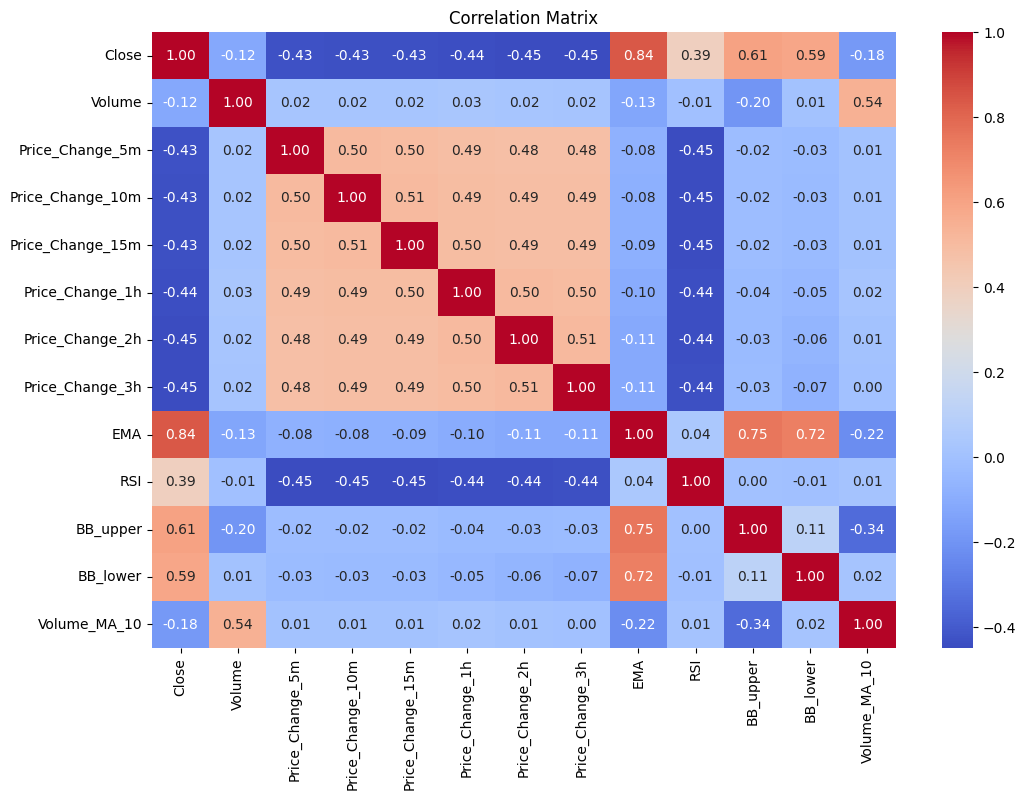

In [ ]:
correlation_matrix = new_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Using VIF technique to remove multicollinearity in features**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

features = new_df.drop(columns=['Price_Change_5m', 'Price_Change_10m', 'Price_Change_15m', 
                                'Price_Change_1h', 'Price_Change_2h', 'Price_Change_3h'])

features_with_constant = add_constant(features)

vif = pd.DataFrame()
vif["Feature"] = features.columns
vif["VIF"] = [variance_inflation_factor(features_with_constant.values, i) 
              for i in range(1, features_with_constant.shape[1])]

print(vif)

        Feature        VIF
0         Close   6.226933
1        Volume   1.423899
2           EMA  76.275076
3           RSI   1.764175
4      BB_upper  30.835767
5      BB_lower  27.898009
6  Volume_MA_10   1.555475


**Comments:**
* EMA (76.275): This is a very high VIF value, indicating that the EMA (Exponential Moving Average) indicator is very strongly correlated with other features. It can cause serious multicollinearity.
* BB_upper (30,836) and BB_lower (27,898): Bollinger Bands indicators also have high VIF values, which can be related to the moving average (EMA) or closing price (Close).
* Close (6.227): VIF value > 5, indicating that this column has moderate correlation with other features. However, it is an important variable so it should be considered when removing.
* Volume, RSI, Volume_MA_10: These features have low VIF (< 5), are safe and do not cause multicollinearity.

In [ ]:
#Drop EMA
new_df.drop(columns='EMA', inplace=True)

#Use BB_width instead of BB_upper and BB_lower
new_df['BB_width'] = new_df['BB_upper'] - new_df['BB_lower']
new_df.drop(columns=['BB_upper', 'BB_lower'], inplace=True)

In [ ]:
vif = pd.DataFrame()
vif["Feature"] = features.columns
vif["VIF"] = [variance_inflation_factor(features_with_constant.values, i) 
              for i in range(1, features_with_constant.shape[1])]

print(vif)

        Feature       VIF
0         Close  1.229041
1        Volume  1.423376
2           RSI  1.189208
3  Volume_MA_10  1.540201
4      BB_width  1.083868


**Comment:**
* The current VIF values ​​are all < 5, meaning that multicollinearity has been effectively handled.
* The retained features (Close, Volume, RSI, Volume_MA_10, BB_width) are no longer highly correlated with each other, ensuring suitable data for the prediction model.

---

### 5. Data normalization

1. **Normalize data for Close column:**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_df[['Close']] = scaler.fit_transform(new_df[['Close']])

In [ ]:
#TEST
new_df.describe()

,Close,Volume,Price_Change_5m,Price_Change_10m,Price_Change_15m,Price_Change_1h,Price_Change_2h,Price_Change_3h,RSI,Volume_MA_10,BB_width
count,162997.000000,162997.000000,162997.000000,162997.000000,162997.000000,162997.000000,162997.000000,162997.000000,162997.000000,162997.000000,162997.000000
mean,0.482117,4014.946812,0.000088,-0.000104,-0.000301,-0.002153,-0.004845,-0.007624,49.968514,4015.010358,23.569380
std,0.125643,4945.524524,10.328704,10.385594,10.409511,10.612667,10.712551,10.761511,5.063688,2841.444775,17.194771
min,0.000000,10.000000,-82.790000,-83.330000,-83.480000,-82.490000,-77.720000,-79.510000,1.856653,54.150000,0.000000
25%,0.386476,1015.000000,-1.512500,-1.570833,-1.657500,-2.050000,-2.554167,-2.760000,48.265153,2087.666667,11.421189
50%,0.496380,2460.000000,0.000000,0.000000,0.000000,-0.005000,-0.025000,-0.055000,50.388461,3271.250000,19.643182
75%,0.554716,5115.000000,1.540000,1.620833,1.725833,2.204167,2.616667,2.800000,51.975700,5074.500000,33.083836
max,1.000000,48150.000000,83.460000,84.350000,86.030000,84.350000,80.540000,84.310000,99.960899,36294.166667,111.073154


2. **Normalize data for Volume**:

**Step 1:** Check for outliers after performing Winsorization.

In [ ]:
z_scores = (new_df['Volume'] - new_df['Volume'].mean()) / new_df['Volume'].std()
outliers = new_df[z_scores.abs() > 3]
print(f"Outliers in Volume:\n", outliers)

Outliers in Volume:
            Close   Volume  Price_Change_5m  Price_Change_10m  \
163068  0.419263  19165.0           11.050            19.050   
162961  0.546218  18995.0           -1.425            -1.125   
162951  0.534414  23770.0           -0.225            -0.150   
162950  0.534676  48150.0           -0.250            -0.175   
162935  0.532840  22475.0           -0.025            -0.125   
...          ...      ...              ...               ...   
385     0.469101  46380.0            0.400             0.500   
371     0.473298  20840.0            0.000            -0.300   
264     0.467002  19000.0            0.200             0.200   
249     0.468052  23800.0            0.400             0.100   
248     0.474347  48150.0           -0.200            -0.500   

        Price_Change_15m  Price_Change_1h  Price_Change_2h  Price_Change_3h  \
163068            10.350        11.025000           10.850         2.516667   
162961            -1.350        -9.683333           

**Comment:**
* This number of outliers is still very large, with more 2850 values ​​out of a total of 162997 values ​​in the dataset (approximately 1.7%).
* Perform a log transformation to reduce the right skewness of the data, which helps to compress these values ​​without removing them.

**Step 2:** Perform data normalization.

In [ ]:
new_df['Volume'] = np.log1p(new_df['Volume'])

In [ ]:
#TEST
new_df.head()

,Close,Volume,Price_Change_5m,Price_Change_10m,Price_Change_15m,Price_Change_1h,Price_Change_2h,Price_Change_3h,RSI,Volume_MA_10,BB_width
163176,0.534414,8.083637,0.000,1.041667,0.025,7.641667,-0.525,0.075000,49.968514,4015.010358,23.56938
163175,0.291785,7.824446,23.125,23.100000,23.150,22.950000,23.175,23.225000,49.968514,4015.010358,23.56938
163174,0.550939,5.707110,-1.600,-1.600000,-1.550,-1.725000,-1.550,-1.500000,49.968514,4015.010358,23.56938
163173,0.292834,6.216606,23.050,23.000000,23.075,22.800000,22.400,22.366667,49.968514,4015.010358,23.56938
163172,0.534152,8.852736,0.025,0.025000,0.100,7.833333,0.075,0.150000,49.968514,4015.010358,23.56938


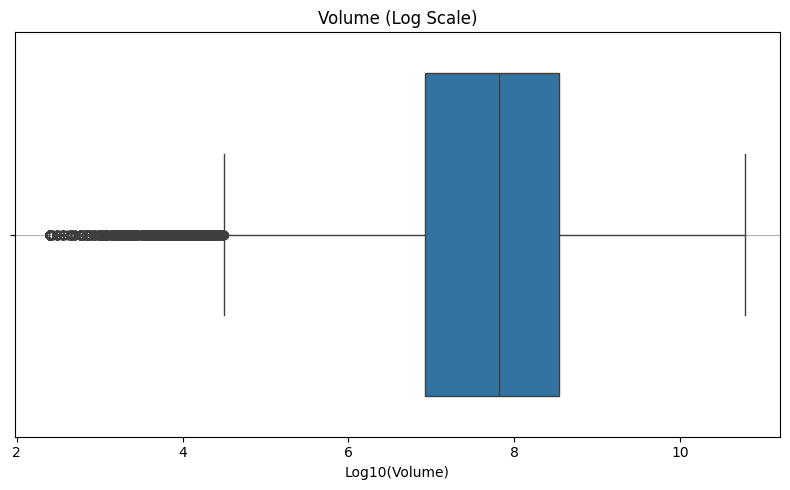

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=new_df, x='Volume')
plt.title('Volume (Log Scale)')
plt.xlabel('Log10(Volume)')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Comment:**
* This chart show that after performing log scale for the volume column, the data distribution is much more stable, the shape of the distribution is also similar to the normal distribution, this will be very good for the next steps.

**Step 3:** Use min-max scaling

In [ ]:
scaler = MinMaxScaler()
new_df['Volume'] = scaler.fit_transform(new_df[['Volume']])

In [ ]:
#TEST
new_df.head()

,Close,Volume,Price_Change_5m,Price_Change_10m,Price_Change_15m,Price_Change_1h,Price_Change_2h,Price_Change_3h,RSI,Volume_MA_10,BB_width
163176,0.534414,0.678149,0.000,1.041667,0.025,7.641667,-0.525,0.075000,49.968514,4015.010358,23.56938
163175,0.291785,0.647235,23.125,23.100000,23.150,22.950000,23.175,23.225000,49.968514,4015.010358,23.56938
163174,0.550939,0.394696,-1.600,-1.600000,-1.550,-1.725000,-1.550,-1.500000,49.968514,4015.010358,23.56938
163173,0.292834,0.455465,23.050,23.000000,23.075,22.800000,22.400,22.366667,49.968514,4015.010358,23.56938
163172,0.534152,0.769881,0.025,0.025000,0.100,7.833333,0.075,0.150000,49.968514,4015.010358,23.56938


3. **Normalize data for `Price_Change_*` columns with standard scaling:**
* Keep the +/- meaning so that the model learns the up/down trend.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['Price_Change_5m', 'Price_Change_10m', 'Price_Change_15m',
                    'Price_Change_1h', 'Price_Change_2h', 'Price_Change_3h']
new_df[columns_to_scale] = scaler.fit_transform(new_df[columns_to_scale])

4. **Columns with large absolute values ​​and no special +/- meaning, like BB_Width we will use min-max normalization.**

In [ ]:
scaler = MinMaxScaler()

columns_to_scale = ['BB_width']
new_df[columns_to_scale] = scaler.fit_transform(new_df[columns_to_scale])

5. **Since RSI is already in the range [0, 100], so We can use min-max scaling to normalize this column for the purpose of synchronization with other columns.**

In [ ]:
new_df['RSI'] = scaler.fit_transform(new_df[['RSI']])

6. **Consider the value distribution of the `Volume Moving Average` column and carry out appropriate standardization methods**

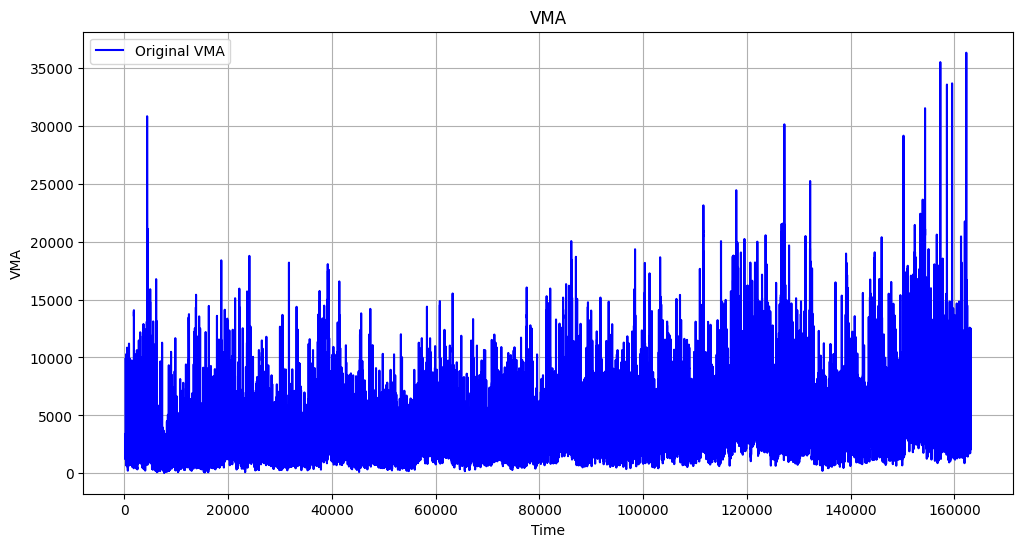

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(new_df.index, new_df['Volume_MA_10'], label='Original VMA', color='blue')
plt.title('VMA')
plt.xlabel('Time')
plt.ylabel('VMA')
plt.legend()
plt.grid()
plt.show()

**Comments:**
* The chart shows that the VMA values ​​fluctuate widely, with some very large spikes.
* The VMA distribution may be right-skewed due to the outliers.

**Conclusions:**
* Use log transformation.
* Use standard scaling.

In [ ]:
new_df['Volume_MA_10'] = np.log1p(new_df['Volume_MA_10'])
scaler = StandardScaler()
new_df['Volume_MA_10'] = scaler.fit_transform(new_df[['Volume_MA_10']])

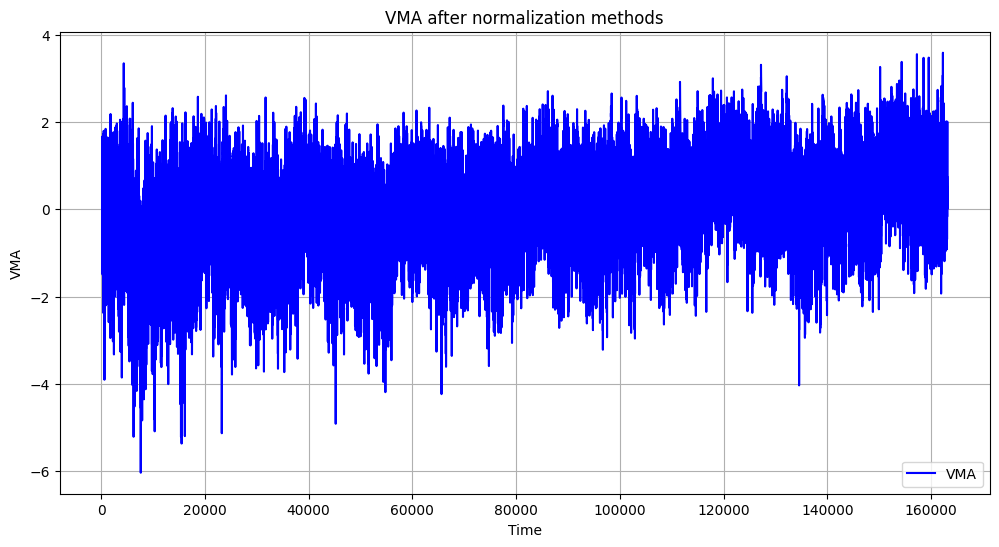

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(new_df.index, new_df['Volume_MA_10'], label='VMA', color='blue')
plt.title('VMA after normalization methods')
plt.xlabel('Time')
plt.ylabel('VMA')
plt.legend()
plt.grid()
plt.show()


---

In [ ]:
#TEST
new_df.head()

,Close,Volume,Price_Change_5m,Price_Change_10m,Price_Change_15m,Price_Change_1h,Price_Change_2h,Price_Change_3h,RSI,Volume_MA_10,BB_width
163176,0.534414,0.678149,-0.000008,0.100310,0.002431,0.720257,-0.048556,0.007678,0.490416,0.323423,0.212197
163175,0.291785,0.647235,2.238905,2.224252,2.223963,2.162720,2.163809,2.158869,0.490416,0.323423,0.212197
163174,0.550939,0.394696,-0.154917,-0.154050,-0.148874,-0.162339,-0.144238,-0.138678,0.490416,0.323423,0.212197
163173,0.292834,0.455465,2.231643,2.214623,2.216758,2.148585,2.091464,2.079109,0.490416,0.323423,0.212197
163172,0.534152,0.769881,0.002412,0.002417,0.009636,0.738317,0.007453,0.014647,0.490416,0.323423,0.212197


In [ ]:
new_df.to_csv('Data/Indicators_Added.csv')

In [ ]:
#TEST
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162997 entries, 163176 to 180
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Close             162997 non-null  float64
 1   Volume            162997 non-null  float64
 2   Price_Change_5m   162997 non-null  float64
 3   Price_Change_10m  162997 non-null  float64
 4   Price_Change_15m  162997 non-null  float64
 5   Price_Change_1h   162997 non-null  float64
 6   Price_Change_2h   162997 non-null  float64
 7   Price_Change_3h   162997 non-null  float64
 8   RSI               162997 non-null  float64
 9   Volume_MA_10      162997 non-null  float64
 10  BB_width          162997 non-null  float64
dtypes: float64(11)
memory usage: 14.9 MB


---

### 6. Build a dataset to prepare for model training

1. Target dataset ( price_change )

In [ ]:
target_labels = ['Price_Change_5m', 'Price_Change_10m', 'Price_Change_15m', 'Price_Change_1h',	'Price_Change_2h',	'Price_Change_3h']
target_dataset = new_df[target_labels]

In [ ]:
#TEST
target_dataset.head()

,Price_Change_5m,Price_Change_10m,Price_Change_15m,Price_Change_1h,Price_Change_2h,Price_Change_3h
163176,-0.000008,0.100310,0.002431,0.720257,-0.048556,0.007678
163175,2.238905,2.224252,2.223963,2.162720,2.163809,2.158869
163174,-0.154917,-0.154050,-0.148874,-0.162339,-0.144238,-0.138678
163173,2.231643,2.214623,2.216758,2.148585,2.091464,2.079109
163172,0.002412,0.002417,0.009636,0.738317,0.007453,0.014647


2. Features dataset

In [ ]:
feature_dataset = new_df.drop(columns=target_labels)

In [ ]:
#TEST
feature_dataset.head()

,Close,Volume,RSI,Volume_MA_10,BB_width
163176,0.534414,0.678149,0.490416,0.323423,0.212197
163175,0.291785,0.647235,0.490416,0.323423,0.212197
163174,0.550939,0.394696,0.490416,0.323423,0.212197
163173,0.292834,0.455465,0.490416,0.323423,0.212197
163172,0.534152,0.769881,0.490416,0.323423,0.212197


### 7. Data Modeling & Evaluating

**7.0 Split the data**

In [ ]:
from sklearn.model_selection import train_test_split

for target in target_labels:
    X_train_name = f"X_train_{target.split('_')[-1]}"
    X_test_name = f"X_test_{target.split('_')[-1]}"
    y_train_name = f"y_train_{target.split('_')[-1]}"
    y_test_name = f"y_test_{target.split('_')[-1]}"
    
    X_train, X_test, y_train, y_test = train_test_split(
        feature_dataset, 
        target_dataset[target],
        test_size=0.2, 
        random_state=42
    )
    
    exec(f"{X_train_name} = X_train")
    exec(f"{X_test_name} = X_test")
    exec(f"{y_train_name} = y_train")
    exec(f"{y_test_name} = y_test")

In [ ]:
#TEST
print(X_train_5m.shape)
print(X_train_5m.head())
print(y_train_2h.shape)
print(y_train_2h.head())

(130397, 5)
           Close    Volume       RSI  Volume_MA_10  BB_width
527     0.487987  0.509936  0.475331      0.987322  0.009654
65507   0.502020  0.706293  0.504044     -1.519789  0.501660
92099   0.549925  0.589477  0.495652     -0.003881  0.343445
27886   0.443290  0.509936  0.498800      0.066224  0.111312
134511  0.489036  0.384354  0.558852     -1.702276  0.274186
(130397,)
527      -0.158241
65507    -0.033620
92099    -1.244820
27886    -0.743537
134511   -0.649877
Name: Price_Change_2h, dtype: float64


**7.1 Building a predictive model to predict stock price movements with LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model_5m = LinearRegression()
linear_model_5m.fit(X_train_5m, y_train_5m)

linear_model_10m = LinearRegression()
linear_model_10m.fit(X_train_10m, y_train_10m)

linear_model_15m = LinearRegression()
linear_model_15m.fit(X_train_15m, y_train_15m)

linear_model_1h = LinearRegression()
linear_model_1h.fit(X_train_1h, y_train_1h)

linear_model_2h = LinearRegression()
linear_model_2h.fit(X_train_2h, y_train_2h)

linear_model_3h = LinearRegression()
linear_model_3h.fit(X_train_3h, y_train_3h)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_5m = linear_model_5m.predict(X_test_5m)
mae_5m = mean_absolute_error(y_test_5m, y_pred_5m)
mse_5m = mean_squared_error(y_test_5m, y_pred_5m)
r2_5m = r2_score(y_test_5m, y_pred_5m)

y_pred_10m = linear_model_10m.predict(X_test_10m)
mae_10m = mean_absolute_error(y_test_10m, y_pred_10m)
mse_10m = mean_squared_error(y_test_10m, y_pred_10m)
r2_10m = r2_score(y_test_10m, y_pred_10m)

y_pred_15m = linear_model_15m.predict(X_test_15m)
mae_15m = mean_absolute_error(y_test_15m, y_pred_15m)
mse_15m = mean_squared_error(y_test_15m, y_pred_15m)
r2_15m = r2_score(y_test_15m, y_pred_15m)

y_pred_1h = linear_model_1h.predict(X_test_1h)
mae_1h = mean_absolute_error(y_test_1h, y_pred_1h)
mse_1h = mean_squared_error(y_test_1h, y_pred_1h)
r2_1h = r2_score(y_test_1h, y_pred_1h)

y_pred_2h = linear_model_2h.predict(X_test_2h)
mae_2h = mean_absolute_error(y_test_2h, y_pred_2h)
mse_2h = mean_squared_error(y_test_2h, y_pred_2h)
r2_2h = r2_score(y_test_2h, y_pred_2h)

y_pred_3h = linear_model_3h.predict(X_test_3h)
mae_3h = mean_absolute_error(y_test_3h, y_pred_3h)
mse_3h = mean_squared_error(y_test_3h, y_pred_3h)
r2_3h = r2_score(y_test_3h, y_pred_3h)

In [ ]:
results_pre_fine_tuning = []

In [ ]:
results_pre_fine_tuning.append({
    'Algorithm': 'Linear Regression',
    'Time' : 5,
    'MAE': mae_5m,
    'MSE': mse_5m,
    'R2': r2_5m
})

results_pre_fine_tuning.append({
    'Algorithm': 'Linear Regression',
    'Time' : 10,
    'MAE': mae_10m,
    'MSE': mse_10m,
    'R2': r2_10m
})

results_pre_fine_tuning.append({
    'Algorithm': 'Linear Regression',
    'Time' : 15,
    'MAE': mae_15m,
    'MSE': mse_15m,
    'R2': r2_15m
})

results_pre_fine_tuning.append({
    'Algorithm': 'Linear Regression',
    'Time' : 60,
    'MAE': mae_1h,
    'MSE': mse_1h,
    'R2': r2_1h
})

results_pre_fine_tuning.append({
    'Algorithm': 'Linear Regression',
    'Time' : 120,
    'MAE': mae_2h,
    'MSE': mse_2h,
    'R2': r2_2h
})

results_pre_fine_tuning.append({
    'Algorithm': 'Linear Regression',
    'Time' : 180,
    'MAE': mae_3h,
    'MSE': mse_3h,
    'R2': r2_3h
})

In [ ]:
results_pre_fine_tuning = pd.DataFrame(results_pre_fine_tuning)
results_pre_fine_tuning

,Algorithm,Time,MAE,MSE,R2
0,Linear Regression,5,0.563536,0.715316,0.277414
1,Linear Regression,10,0.566483,0.727803,0.276797
2,Linear Regression,15,0.560367,0.711338,0.281186
3,Linear Regression,60,0.563204,0.697411,0.284712
4,Linear Regression,120,0.576722,0.720448,0.279444
5,Linear Regression,180,0.572849,0.708385,0.282999


**Comments:**
* The R² value ranges from 0.27 - 0.28, indicating that the model only explains about 27-28% of the variation in the data. This may be because Linear Regression is not suitable for non-linear data such as stock price fluctuations.
* Neither MAE ( ~0.56 - 0.57 ) nor MSE ( ~0.69 - 0.72) decreased or increased significantly with changing the time interval.

**Conclusions:**
* This could be because Linear Regression fails to take advantage of nonlinear features or complex relationships in the data.
* A low R² indicates that Linear Regression is not explaining the price fluctuations in the data well. This could also be a sign to try other nonlinear models like Random Forest or Gradient Boosting.

**7.2 Building a predictive model to predict stock price movements with RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model_5m = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_5m.fit(X_train_5m, y_train_5m)

rf_model_10m = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_10m.fit(X_train_10m, y_train_10m)

rf_model_15m = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_15m.fit(X_train_15m, y_train_15m)

rf_model_1h = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_1h.fit(X_train_1h, y_train_1h)

rf_model_2h = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_2h.fit(X_train_2h, y_train_2h)

rf_model_3h = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_3h.fit(X_train_3h, y_train_3h)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_5m = rf_model_5m.predict(X_test_5m)
mae_5m = mean_absolute_error(y_test_5m, y_pred_5m)
mse_5m = mean_squared_error(y_test_5m, y_pred_5m)
r2_5m = r2_score(y_test_5m, y_pred_5m)

y_pred_10m = rf_model_10m.predict(X_test_10m)
mae_10m = mean_absolute_error(y_test_10m, y_pred_10m)
mse_10m = mean_squared_error(y_test_10m, y_pred_10m)
r2_10m = r2_score(y_test_10m, y_pred_10m)

y_pred_15m = rf_model_15m.predict(X_test_15m)
mae_15m = mean_absolute_error(y_test_15m, y_pred_15m)
mse_15m = mean_squared_error(y_test_15m, y_pred_15m)
r2_15m = r2_score(y_test_15m, y_pred_15m)

y_pred_1h = rf_model_1h.predict(X_test_1h)
mae_1h = mean_absolute_error(y_test_1h, y_pred_1h)
mse_1h = mean_squared_error(y_test_1h, y_pred_1h)
r2_1h = r2_score(y_test_1h, y_pred_1h)

y_pred_2h = rf_model_2h.predict(X_test_2h)
mae_2h = mean_absolute_error(y_test_2h, y_pred_2h)
mse_2h = mean_squared_error(y_test_2h, y_pred_2h)
r2_2h = r2_score(y_test_2h, y_pred_2h)

y_pred_3h = rf_model_3h.predict(X_test_3h)
mae_3h = mean_absolute_error(y_test_3h, y_pred_3h)
mse_3h = mean_squared_error(y_test_3h, y_pred_3h)
r2_3h = r2_score(y_test_3h, y_pred_3h)

In [ ]:
new_data = pd.DataFrame([{
    'Algorithm': 'Random Forest Regressor',
    'Time': 5,
    'MAE': mae_5m,
    'MSE': mse_5m,
    'R2': r2_5m
}, {
    'Algorithm': 'Random Forest Regressor',
    'Time': 10,
    'MAE': mae_10m,
    'MSE': mse_10m,
    'R2': r2_10m
}, {
    'Algorithm': 'Random Forest Regressor',
    'Time': 15,
    'MAE': mae_15m,
    'MSE': mse_15m,
    'R2': r2_15m
}, {
    'Algorithm': 'Random Forest Regressor',
    'Time': 60,
    'MAE': mae_1h,
    'MSE': mse_1h,
    'R2': r2_1h
}, {
    'Algorithm': 'Random Forest Regressor',
    'Time': 120,
    'MAE': mae_2h,
    'MSE': mse_2h,
    'R2': r2_2h
}, {
    'Algorithm': 'Random Forest Regressor',
    'Time': 180,
    'MAE': mae_3h,
    'MSE': mse_3h,
    'R2': r2_3h
}])

results_pre_fine_tuning = pd.concat([results_pre_fine_tuning, new_data], ignore_index=True)

In [ ]:
results_pre_fine_tuning = pd.DataFrame(results_pre_fine_tuning)
results_pre_fine_tuning

,Algorithm,Time,MAE,MSE,R2
0,Linear Regression,5,0.563536,0.715316,0.277414
1,Linear Regression,10,0.566483,0.727803,0.276797
2,Linear Regression,15,0.560367,0.711338,0.281186
3,Linear Regression,60,0.563204,0.697411,0.284712
4,Linear Regression,120,0.576722,0.720448,0.279444
5,Linear Regression,180,0.572849,0.708385,0.282999
6,Random Forest Regressor,5,0.449971,0.560473,0.433830
7,Random Forest Regressor,10,0.451692,0.568443,0.435150
8,Random Forest Regressor,15,0.446762,0.554686,0.439485
9,Random Forest Regressor,60,0.444357,0.530787,0.455607


**Comments:**
* The MAE values ​​ranged from 0.444 to 0.458 for different time periods. This shows that the model can predict price movements with a fairly small average error.
* MSE values ​​decrease from short (5 min) to long (180 min) time. This is consistent with the fact that long-term volatility is often more predictable, as price trends can be clearer.
* The R^2 value ranges from 0.43 to 0.45, indicating that the model explains about 43-45% of the variation in the data. This result is not too high, but still acceptable for the problem of predicting stock price fluctuations, which has many random and nonlinear factors.
* Above all, it can be seen that **Random Forest Regressor gives better results than Linear Regression**: 
  * The MAE and MSE of Random Forest are lower than Linear Regression, especially over long time periods.
  * The R^2 of Random Forest is higher than Linear Regression, indicating that this model captures nonlinear relationships better.

**7.3 Building a predictive model to predict stock price movements with XGBOOST (Extreme Gradient Boosting)**

In [ ]:
from xgboost import XGBRegressor

xgb_model_5m = XGBRegressor(
    n_estimators=50,      
    learning_rate=0.1,     
    max_depth=6,
    eval_metric="rmse",
    random_state=42
)

xgb_model_10m = XGBRegressor(
    n_estimators=50,      
    learning_rate=0.1,     
    max_depth=6,
    eval_metric="rmse",
    random_state=42
)

xgb_model_15m = XGBRegressor(
    n_estimators=50,      
    learning_rate=0.1,     
    max_depth=6,
    eval_metric="rmse",
    random_state=42
)

xgb_model_1h = XGBRegressor(
    n_estimators=50,      
    learning_rate=0.1,     
    max_depth=6,
    eval_metric="rmse",
    random_state=42
)

xgb_model_2h = XGBRegressor(
    n_estimators=50,      
    learning_rate=0.1,     
    max_depth=6,
    eval_metric="rmse",
    random_state=42
)

xgb_model_3h = XGBRegressor(
    n_estimators=50,      
    learning_rate=0.1,     
    max_depth=6,
    eval_metric="rmse",
    random_state=42
)

xgb_model_5m.fit(X_train_5m, y_train_5m)
y_pred_5m = xgb_model_5m.predict(X_test_5m)

xgb_model_10m.fit(X_train_10m, y_train_10m)
y_pred_10m = xgb_model_10m.predict(X_test_10m)

xgb_model_15m.fit(X_train_15m, y_train_15m)
y_pred_15m = xgb_model_15m.predict(X_test_15m)

xgb_model_1h.fit(X_train_1h, y_train_1h)
y_pred_1h = xgb_model_1h.predict(X_test_1h)

xgb_model_2h.fit(X_train_2h, y_train_2h)
y_pred_2h = xgb_model_2h.predict(X_test_2h)

xgb_model_3h.fit(X_train_3h, y_train_3h)
y_pred_3h = xgb_model_3h.predict(X_test_3h)

In [ ]:
mae_5m = mean_absolute_error(y_test_5m, y_pred_5m)
mse_5m = mean_squared_error(y_test_5m, y_pred_5m)
r2_5m = r2_score(y_test_5m, y_pred_5m)

mae_10m = mean_absolute_error(y_test_10m, y_pred_10m)
mse_10m = mean_squared_error(y_test_10m, y_pred_10m)
r2_10m = r2_score(y_test_10m, y_pred_10m)

mae_15m = mean_absolute_error(y_test_15m, y_pred_15m)
mse_15m = mean_squared_error(y_test_15m, y_pred_15m)
r2_15m = r2_score(y_test_15m, y_pred_15m)

mae_1h = mean_absolute_error(y_test_1h, y_pred_1h)
mse_1h = mean_squared_error(y_test_1h, y_pred_1h)
r2_1h = r2_score(y_test_1h, y_pred_1h)

mae_2h = mean_absolute_error(y_test_2h, y_pred_2h)
mse_2h = mean_squared_error(y_test_2h, y_pred_2h)
r2_2h = r2_score(y_test_2h, y_pred_2h)

mae_3h = mean_absolute_error(y_test_3h, y_pred_3h)
mse_3h = mean_squared_error(y_test_3h, y_pred_3h)
r2_3h = r2_score(y_test_3h, y_pred_3h)

In [ ]:
new_data = pd.DataFrame([{
    'Algorithm': 'XGBoost',
    'Time': 5,
    'MAE': mae_5m,
    'MSE': mse_5m,
    'R2': r2_5m
}, {
    'Algorithm': 'XGBoost',
    'Time': 10,
    'MAE': mae_10m,
    'MSE': mse_10m,
    'R2': r2_10m
}, {
    'Algorithm': 'XGBoost',
    'Time': 15,
    'MAE': mae_15m,
    'MSE': mse_15m,
    'R2': r2_15m
}, {
    'Algorithm': 'XGBoost',
    'Time': 60,
    'MAE': mae_1h,
    'MSE': mse_1h,
    'R2': r2_1h
}, {
    'Algorithm': 'XGBoost',
    'Time': 120,
    'MAE': mae_2h,
    'MSE': mse_2h,
    'R2': r2_2h
}, {
    'Algorithm': 'XGBoost',
    'Time': 180,
    'MAE': mae_3h,
    'MSE': mse_3h,
    'R2': r2_3h
}])

In [ ]:
results_pre_fine_tuning = pd.concat([results_pre_fine_tuning, new_data], ignore_index=True)
results_pre_fine_tuning = pd.DataFrame(results_pre_fine_tuning)
results_pre_fine_tuning

,Algorithm,Time,MAE,MSE,R2
0,Linear Regression,5,0.563536,0.715316,0.277414
1,Linear Regression,10,0.566483,0.727803,0.276797
2,Linear Regression,15,0.560367,0.711338,0.281186
3,Linear Regression,60,0.563204,0.697411,0.284712
4,Linear Regression,120,0.576722,0.720448,0.279444
5,Linear Regression,180,0.572849,0.708385,0.282999
6,Random Forest Regressor,5,0.449971,0.560473,0.433830
7,Random Forest Regressor,10,0.451692,0.568443,0.435150
8,Random Forest Regressor,15,0.446762,0.554686,0.439485
9,Random Forest Regressor,60,0.444357,0.530787,0.455607


**Comments:**
* The MAE value ranges from 0.427 to 0.445. This value is quite stable when the forecast time varies from 5 minutes to 3 hours.
* The MSE value decreases slightly with shorter time horizons (5 min, 10 min) and increases slightly with longer time horizons (3 h). This shows that the model can predict better in the short term.
* The R² values ​​ranged from 0.457 to 0.463, with the highest at the 60-minute time and the lowest at the 5-minute time. This shows that the model's ability to explain variance increases as the forecast becomes longer.
* Compared to Random Forest, XGBoost can have better performance.

---
### 8. Improve model performance with cross validation and hybrid model building (multi-model) methods

**Comments:**
With the above models, it seems that XGboost and Random forest are the 2 models that give the best results, so we will focus on fine-tuning these 2 models.

**8.1 XGBoost with cross validation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import pandas as pd

datasets = {
    '5m': (X_train_5m, y_train_5m),
    '10m': (X_train_10m, y_train_10m),
    '15m': (X_train_15m, y_train_15m),
    '1h': (X_train_1h, y_train_1h),
    '2h': (X_train_2h, y_train_2h),
    '3h': (X_train_3h, y_train_3h),
}

param_grid = {
    'n_estimators': [300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

results_fine_tuned = []

for time_period, (X_train, y_train) in datasets.items():
    print(f"Running GridSearch for {time_period}...")

    grid_search = GridSearchCV(
        estimator=XGBRegressor(random_state=42),
        param_grid=param_grid,
        scoring='neg_mean_absolute_error',
        cv=3,
        verbose=2
    )

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = -grid_search.best_score_

    results_fine_tuned.append({
        'Time Period': time_period,
        'Best Parameters': best_params,
        'Best MAE': best_score
    })

results_fine_tuned_df = pd.DataFrame(results_fine_tuned)

print(results_fine_tuned_df)


Running GridSearch for 5m...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.8;

In [ ]:
params_df = results_fine_tuned_df['Best Parameters'].apply(pd.Series)

In [ ]:
params_df # n_estimators=500, learning_rate=0.01, max_depth=6, colsample_bytree=1.0, subsample = 0.8

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample
0,1.0,0.01,6.0,500.0,0.8
1,1.0,0.01,6.0,500.0,0.8
2,1.0,0.01,6.0,500.0,0.8
3,1.0,0.01,6.0,500.0,0.8
4,1.0,0.01,6.0,500.0,0.8
5,1.0,0.01,8.0,500.0,0.8


**Comments:**
* It can be seen that the optimal parameters for each time interval are colsample_bytree = 1.0, learning_rate = 0.01, max_depth = 6.0, n_estimators = 500, subsample = 0.8

**Build XGBoost model with best parameters**

In [ ]:
xgb_model_5m = XGBRegressor(
    n_estimators=500,      
    learning_rate=0.01,     
    max_depth=6,
    eval_metric="rmse",
    colsample_bytree=1.0,
    subsample = 0.8,
    random_state=42
)

xgb_model_10m = XGBRegressor(
    n_estimators=500,      
    learning_rate=0.01,     
    max_depth=6,
    eval_metric="rmse",
    colsample_bytree=1.0,
    subsample = 0.8,
    random_state=42
)

xgb_model_15m = XGBRegressor(
    n_estimators=500,      
    learning_rate=0.01,     
    max_depth=6,
    eval_metric="rmse",
    colsample_bytree=1.0,
    subsample = 0.8,
    random_state=42
)

xgb_model_1h = XGBRegressor(
    n_estimators=500,      
    learning_rate=0.01,     
    max_depth=6,
    eval_metric="rmse",
    colsample_bytree=1.0,
    subsample = 0.8,
    random_state=42
)

xgb_model_2h = XGBRegressor(
    n_estimators=500,      
    learning_rate=0.01,     
    max_depth=6,
    eval_metric="rmse",
    colsample_bytree=1.0,
    subsample = 0.8,
    random_state=42
)

xgb_model_3h = XGBRegressor(
    n_estimators=500,      
    learning_rate=0.01,     
    max_depth=6,
    eval_metric="rmse",
    colsample_bytree=1.0,
    subsample = 0.8,
    random_state=42
)

xgb_model_5m.fit(X_train_5m, y_train_5m)
y_pred_5m = xgb_model_5m.predict(X_test_5m)

xgb_model_10m.fit(X_train_10m, y_train_10m)
y_pred_10m = xgb_model_10m.predict(X_test_10m)

xgb_model_15m.fit(X_train_15m, y_train_15m)
y_pred_15m = xgb_model_15m.predict(X_test_15m)

xgb_model_1h.fit(X_train_1h, y_train_1h)
y_pred_1h = xgb_model_1h.predict(X_test_1h)

xgb_model_2h.fit(X_train_2h, y_train_2h)
y_pred_2h = xgb_model_2h.predict(X_test_2h)

xgb_model_3h.fit(X_train_3h, y_train_3h)
y_pred_3h = xgb_model_3h.predict(X_test_3h)

In [ ]:
mae_5m = mean_absolute_error(y_test_5m, y_pred_5m)
mse_5m = mean_squared_error(y_test_5m, y_pred_5m)
r2_5m = r2_score(y_test_5m, y_pred_5m)

mae_10m = mean_absolute_error(y_test_10m, y_pred_10m)
mse_10m = mean_squared_error(y_test_10m, y_pred_10m)
r2_10m = r2_score(y_test_10m, y_pred_10m)

mae_15m = mean_absolute_error(y_test_15m, y_pred_15m)
mse_15m = mean_squared_error(y_test_15m, y_pred_15m)
r2_15m = r2_score(y_test_15m, y_pred_15m)

mae_1h = mean_absolute_error(y_test_1h, y_pred_1h)
mse_1h = mean_squared_error(y_test_1h, y_pred_1h)
r2_1h = r2_score(y_test_1h, y_pred_1h)

mae_2h = mean_absolute_error(y_test_2h, y_pred_2h)
mse_2h = mean_squared_error(y_test_2h, y_pred_2h)
r2_2h = r2_score(y_test_2h, y_pred_2h)

mae_3h = mean_absolute_error(y_test_3h, y_pred_3h)
mse_3h = mean_squared_error(y_test_3h, y_pred_3h)
r2_3h = r2_score(y_test_3h, y_pred_3h)

In [ ]:
XGboost_fine_tuned = pd.DataFrame([{
    'Algorithm': 'XGBoost',
    'Time': 5,
    'MAE': mae_5m,
    'MSE': mse_5m,
    'R2': r2_5m
}, {
    'Algorithm': 'XGBoost',
    'Time': 10,
    'MAE': mae_10m,
    'MSE': mse_10m,
    'R2': r2_10m
}, {
    'Algorithm': 'XGBoost',
    'Time': 15,
    'MAE': mae_15m,
    'MSE': mse_15m,
    'R2': r2_15m
}, {
    'Algorithm': 'XGBoost',
    'Time': 60,
    'MAE': mae_1h,
    'MSE': mse_1h,
    'R2': r2_1h
}, {
    'Algorithm': 'XGBoost',
    'Time': 120,
    'MAE': mae_2h,
    'MSE': mse_2h,
    'R2': r2_2h
}, {
    'Algorithm': 'XGBoost',
    'Time': 180,
    'MAE': mae_3h,
    'MSE': mse_3h,
    'R2': r2_3h
}])

In [ ]:
#TEST
XGboost_fine_tuned

,Algorithm,Time,MAE,MSE,R2
0,XGBoost,5,0.430356,0.535519,0.459038
1,XGBoost,10,0.430581,0.541664,0.461760
2,XGBoost,15,0.426880,0.532502,0.461901
3,XGBoost,60,0.427867,0.517427,0.469310
4,XGBoost,120,0.444233,0.539274,0.460645
5,XGBoost,180,0.444988,0.528557,0.465014


**8.2 Random forest with cross validation**

**Comment:** Because the time to perform cross validation for the random forest algorithm here will be very long, I will only take 2 representatives for time, 10m and 2h.

In [ ]:
datasets = {
    '10m': (X_train_10m, y_train_10m),
    '2h': (X_train_2h, y_train_2h)
}

param_grid_rf = {
    'n_estimators': [100, 200, 500],     # Number of trees
    'max_depth': [4, 6, 10],            # Depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples in a leaf
}

# Store results
rf_fine_tuned = []

# Loop through each time period
for time_period, (X_train, y_train) in datasets.items():
    print(f"Running GridSearch for {time_period}...")

    # Initialize GridSearchCV
    grid_search_rf = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid=param_grid_rf,
        scoring='neg_mean_absolute_error',
        cv=3,
        verbose=2
    )

    # Perform the grid search
    grid_search_rf.fit(X_train, y_train)

    # Get the best parameters and score
    best_params_rf = grid_search_rf.best_params_
    best_score_rf = -grid_search_rf.best_score_  # Neg MAE to positive MAE

    # Append results
    rf_fine_tuned.append({
        'Time Period': time_period,
        'Best Parameters': best_params_rf,
        'Best MAE': best_score_rf
    })

# Convert results to DataFrame
results_rf_fine_tuned_df = pd.DataFrame(rf_fine_tuned)

# Display results
print(results_rf_fine_tuned_df)


Running GridSearch for 10m...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.9s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.9s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.9s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  19.7s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  19.9s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  19.8s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  51.1s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  50.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  49.7s
[CV] END

In [ ]:
params_df = results_rf_fine_tuned_df['Best Parameters'].apply(pd.Series)

In [ ]:
params_df # Results: best_max_depth=10; best_min_samples_leaf=4; best_min_samples_split=10; best_n_estimators=500

,max_depth,min_samples_leaf,min_samples_split,n_estimators
0,10,4,10,500
1,10,4,10,500


**Build the model with best parameters**

In [ ]:
best_max_depth=10; best_min_samples_leaf=4; best_min_samples_split=10; best_n_estimators=500

rf_model_5m = RandomForestRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, n_estimators=best_n_estimators)
rf_model_5m.fit(X_train_5m, y_train_5m)

rf_model_10m = RandomForestRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, n_estimators=best_n_estimators)
rf_model_10m.fit(X_train_10m, y_train_10m)

rf_model_15m = RandomForestRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, n_estimators=best_n_estimators)
rf_model_15m.fit(X_train_15m, y_train_15m)

rf_model_1h = RandomForestRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, n_estimators=best_n_estimators)
rf_model_1h.fit(X_train_1h, y_train_1h)

rf_model_2h = RandomForestRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, n_estimators=best_n_estimators)
rf_model_2h.fit(X_train_2h, y_train_2h)

rf_model_3h = RandomForestRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, n_estimators=best_n_estimators)
rf_model_3h.fit(X_train_3h, y_train_3h)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500)

In [ ]:
y_pred_5m = rf_model_5m.predict(X_test_5m)
mae_5m = mean_absolute_error(y_test_5m, y_pred_5m)
mse_5m = mean_squared_error(y_test_5m, y_pred_5m)
r2_5m = r2_score(y_test_5m, y_pred_5m)

y_pred_10m = rf_model_10m.predict(X_test_10m)
mae_10m = mean_absolute_error(y_test_10m, y_pred_10m)
mse_10m = mean_squared_error(y_test_10m, y_pred_10m)
r2_10m = r2_score(y_test_10m, y_pred_10m)

y_pred_15m = rf_model_15m.predict(X_test_15m)
mae_15m = mean_absolute_error(y_test_15m, y_pred_15m)
mse_15m = mean_squared_error(y_test_15m, y_pred_15m)
r2_15m = r2_score(y_test_15m, y_pred_15m)

y_pred_1h = rf_model_1h.predict(X_test_1h)
mae_1h = mean_absolute_error(y_test_1h, y_pred_1h)
mse_1h = mean_squared_error(y_test_1h, y_pred_1h)
r2_1h = r2_score(y_test_1h, y_pred_1h)

y_pred_2h = rf_model_2h.predict(X_test_2h)
mae_2h = mean_absolute_error(y_test_2h, y_pred_2h)
mse_2h = mean_squared_error(y_test_2h, y_pred_2h)
r2_2h = r2_score(y_test_2h, y_pred_2h)

y_pred_3h = rf_model_3h.predict(X_test_3h)
mae_3h = mean_absolute_error(y_test_3h, y_pred_3h)
mse_3h = mean_squared_error(y_test_3h, y_pred_3h)
r2_3h = r2_score(y_test_3h, y_pred_3h)

In [ ]:
rf_fine_tuned = pd.DataFrame([{
    'Algorithm': 'Random Forest Regressor',
    'Time': 5,
    'MAE': mae_5m,
    'MSE': mse_5m,
    'R2': r2_5m
}, {
    'Algorithm': 'Random Forest Regressor',
    'Time': 10,
    'MAE': mae_10m,
    'MSE': mse_10m,
    'R2': r2_10m
}, {
    'Algorithm': 'Random Forest Regressor',
    'Time': 15,
    'MAE': mae_15m,
    'MSE': mse_15m,
    'R2': r2_15m
}, {
    'Algorithm': 'Random Forest Regressor',
    'Time': 60,
    'MAE': mae_1h,
    'MSE': mse_1h,
    'R2': r2_1h
}, {
    'Algorithm': 'Random Forest Regressor',
    'Time': 120,
    'MAE': mae_2h,
    'MSE': mse_2h,
    'R2': r2_2h
}, {
    'Algorithm': 'Random Forest Regressor',
    'Time': 180,
    'MAE': mae_3h,
    'MSE': mse_3h,
    'R2': r2_3h
}])

In [ ]:
#TEST
rf_fine_tuned

,Algorithm,Time,MAE,MSE,R2
0,Random Forest Regressor,5,0.430575,0.536074,0.458478
1,Random Forest Regressor,10,0.429835,0.541033,0.462386
2,Random Forest Regressor,15,0.426439,0.530958,0.463462
3,Random Forest Regressor,60,0.427718,0.516450,0.470312
4,Random Forest Regressor,120,0.443382,0.537913,0.462006
5,Random Forest Regressor,180,0.443756,0.528641,0.464930


---

**8.3 In addition to the above methods, we can use another method which is to use hybrid models. For example, I will use an XGBoost model combined with Randomforest in the form of stacking combined with linear regression.**

In [ ]:
from sklearn.ensemble import StackingRegressor

# Define base models with best parameter
base_models = [
    ('rf', RandomForestRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, n_estimators=best_n_estimators )),
    ('xgb', XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=6, eval_metric="rmse", colsample_bytree=1.0, subsample = 0.8, random_state=42))
]

# Define meta-model
meta_model = LinearRegression()

# Create stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train and predict
stacking_model.fit(X_train_5m, y_train_5m)
y_pred_hybrid = stacking_model.predict(X_test_5m)

**Hyprid model evaluation**

In [ ]:
mae = mean_absolute_error(y_test, y_pred_hybrid)
mse = mean_squared_error(y_test, y_pred_hybrid)
r2 = r2_score(y_test, y_pred_hybrid)

print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

MAE: 0.44541135965110756, MSE: 0.528098380036809, R2: 0.4654785748773351


---

### 9. Review and Comment

#### Results of models:
* For single model the best to worst performance order is XGboost, Random Forest, Linear Regression. In which the result of XGBoost (R^2 ~ 0.47) is about 1-2% better than Random forest (R^2 ~ 0.46). In contrast, Linear Regression (R^2 ~ 0.27) produces results that are twice as bad as the other two algorithms.
* After fine-tuning the hyperparameters for each individual dataset, we can see that the accuracy of the prediction model is also improved and more stable. With default parameters, the model only gives results with high variance 3-4%; then the results between data sets are only 1-2% different. Indexes such as MAE, MSE, R^2 are improved also.
* For multi-model, we can see that the results are also improved by about 2% compared to using a single model. Specifically, with a 5m dataset, the R^2 result (~0.465) is better than the two single models XGboost (0.45) and Random Forest (0.45).

#### Conclusion:
* In general, with traditional machine learning models such as Random forest, linear regression depends a lot on the data set and how it is processed. In terms of results, the model with R^2 = 0.46 is acceptable. But in terms of efficiency in the problem, it seems that the model still needs to be improved, from data processing to model building.

#### Some methods to improve model performance:
1. Data processing: 
   * Perform noise filtering for the dataset using some other methods like PCA, Kalman Filter, etc.
   * Collect more data is good also.
2. Data normalization:
   * Since the volume has a lot of noisy data, we can use the robust scaling method.
3. Dataset features:
   * Consider replacing or removing various indicators. Such as: Stochastic Oscillator, ATR (Average True Range), On-Balance Volume (OBV), ADX (Average Directional Index), etc.
4. Data modeling:
   * Focus on using multiple models together, using additional methods such as fine tuning of hyperparameters, cross validation, or using some AutoML Framework like H20, Auto-Sklearn, PyCaret, and so on.
   * Maybe try some more deep learning algorithms like LSTM (Long Short-Term Memory).

### 10. Use Deep Learning to predict the price stock movement

In [ ]:
dl_df = pd.read_csv('Data/Indicators_Added.csv', index_col=0)

In [ ]:
dl_df

,Close,Volume,Price_Change_5m,Price_Change_10m,Price_Change_15m,Price_Change_1h,Price_Change_2h,Price_Change_3h,RSI,Volume_MA_10,BB_width
163176,0.534414,0.678149,-0.000008,0.100310,0.002431,0.720257,-0.048556,0.007678,0.490416,0.323423,0.212197
163175,0.291785,0.647235,2.238905,2.224252,2.223963,2.162720,2.163809,2.158869,0.490416,0.323423,0.212197
163174,0.550939,0.394696,-0.154917,-0.154050,-0.148874,-0.162339,-0.144238,-0.138678,0.490416,0.323423,0.212197
163173,0.292834,0.455465,2.231643,2.214623,2.216758,2.148585,2.091464,2.079109,0.490416,0.323423,0.212197
163172,0.534152,0.769881,0.002412,0.002417,0.009636,0.738317,0.007453,0.014647,0.490416,0.323423,0.212197
...,...,...,...,...,...,...,...,...,...,...,...
184,0.469101,0.734102,-0.000008,0.000010,0.000029,0.000203,-0.139571,-0.185140,0.556104,-0.637986,0.002886
183,0.469101,0.394696,0.019355,0.000010,0.000029,0.000203,-0.139571,-0.175847,0.556104,-0.856715,0.002886
182,0.469101,0.640869,0.019355,0.000010,0.000029,0.000203,-0.120901,-0.138678,0.556104,-0.704415,0.002886
181,0.469101,0.182955,0.029037,-0.009619,0.000029,0.000203,-0.120901,-0.185140,0.556104,-0.725237,0.002886


In [ ]:
Q1 = dl_df['Volume'].quantile(0.25)
Q3 = dl_df['Volume'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dl_df = dl_df[(dl_df['Volume'] >= lower_bound) & (dl_df['Volume'] <= upper_bound)]

In [ ]:

new_feature_dataset = dl_df.drop(columns=target_labels)
new_target_dataset = dl_df[target_labels]

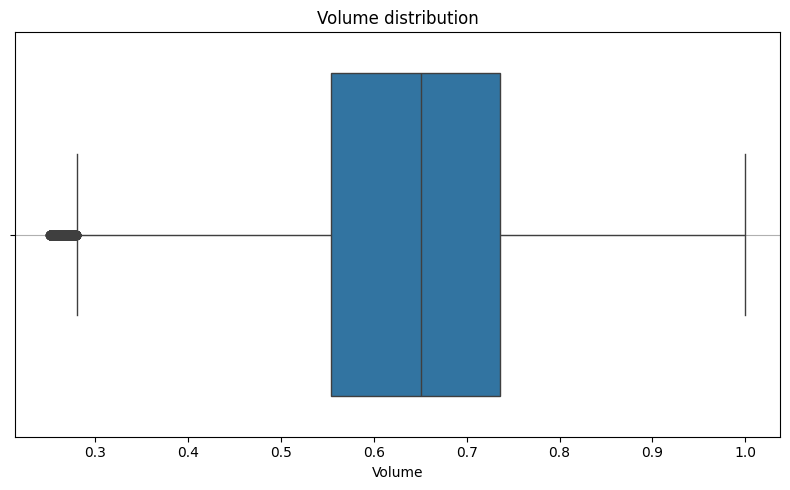

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=new_feature_dataset, x='Volume')
plt.title('Volume distribution')
plt.xlabel('Volume')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    new_feature_dataset, 
    new_target_dataset['Price_Change_5m'],
    test_size=0.2, 
    random_state=42
)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense
from keras.losses import Huber

# CNN for feature extraction
cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(128, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
cnn.compile(optimizer='adam', loss=Huber(delta=1.0))

X_train_reshaped = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(-1, X_test.shape[1], 1)

# Train CNN
cnn.fit(
    X_train_reshaped, y_train.values,
    epochs=50, batch_size=32, verbose=1
)

# Extract features using CNN
cnn_features_train = cnn.predict(X_train_reshaped)
cnn_features_test = cnn.predict(X_test_reshaped)

# Train XGBoost on extracted features
xgb = XGBRegressor(n_estimators=500,      
    learning_rate=0.01,     
    max_depth=6,
    eval_metric="rmse",
    colsample_bytree=1.0,
    subsample = 0.8,
    random_state=42)
xgb.fit(cnn_features_train, y_train)
y_pred = xgb.predict(cnn_features_test)

Epoch 1/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2529
Epoch 2/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2152
Epoch 3/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2124
Epoch 4/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2130
Epoch 5/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2120
Epoch 6/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2123
Epoch 7/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2073
Epoch 8/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2112
Epoch 9/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2100
Epoch 10/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2094
Epoch 11/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2076
Epoch 12/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2062
Epoch 13/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2067
Epoch 14/50
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2095
Epoch 15/50
3932/3932 ━━━━━━━

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 0.42763303075672504
Mean Squared Error: 0.5333411385358726
R2 Score: 0.4478224816703329


**Comments:**
* We can see that although the R^2 score is lower, the MAE and MSE scores are better, which proves that the model is stable and the model's ability to withstand noise has increased. I think it can be called a fundamental trade-off in machine learning.
* By trying out a few more combinations or parameters, we can find the final result for the problem of predicting stock price movements over time.